TypeError: Slider.__init__() takes 5 positional arguments but 6 were given

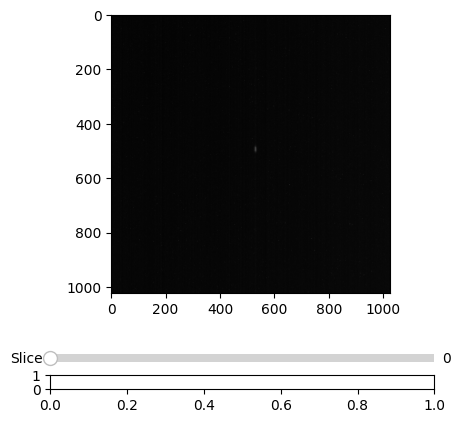

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from pyhdf.SD import SD, SDC

# 1. Load HDF file
def load_hdf_dataset():
    
    # Open HDF file
    filename = 'iawross.hdf'  # Update with your file path
    hdf = SD(filename, SDC.READ)
    
    # Get dataset
    dataset_name = list(hdf.datasets().keys())[0]
    data = hdf.select(dataset_name)
    dataset = data[:, :].astype(np.float64)
    hdf.end()
    
    return dataset.astype(np.float32)  # Convert to float for noise calculations


# Add a second slider to navigate through slices
def create_interface(original):
    fig, ax = plt.subplots()
    plt.subplots_adjust(bottom=0.3)
    
    # Initial image
    img = ax.imshow(original[0], cmap='gray')
    
    # Create slice navigation slider
    ax_slice = plt.axes([0.2, 0.15, 0.6, 0.03])
    slice_slider = Slider(ax_slice, 'Slice', 0, original.shape[0]-1, valinit=0, valstep=1)
    
    # SNR slider
    ax_snr = plt.axes([0.2, 0.1, 0.6, 0.03])
    snr_slider = Slider(ax_snr, 'SNR (dB)', 0, 50, 20)
    
    def update(val):
        img.set_data(original[int(slice_slider.val)])
        plt.draw()
    
    slice_slider.on_changed(update)
    return fig, img, snr_slider

# 3. Noise calculation and update function
def create_update_function(original, img):
    signal_power = np.var(original)
    
    def update(val):
        snr_db = val
        snr_linear = 10 ** (snr_db / 10)
        noise_power = signal_power / snr_linear
        
        # Generate Gaussian noise
        noise = np.random.normal(0, np.sqrt(noise_power), original.shape)
        noisy_image = original + noise
        
        # Update displayed image
        img.set_data(noisy_image)
        plt.title(f'SNR: {snr_db:.1f} dB')
        plt.draw()
    
    return update

# Main workflow
if __name__ == "__main__":
    # Configuration - Update these paths
    FILE_PATH = 'iaw.hdf'
    DATASET_PATH = 'data/'
    
    # Load data
    original_image = load_hdf_dataset()
    
    # Create interface
    fig, img, snr_slider = create_interface(original_image)
    
    # Set up update mechanism
    update_fn = create_update_function(original_image, img)
    snr_slider.on_changed(update_fn)
    
    plt.show()

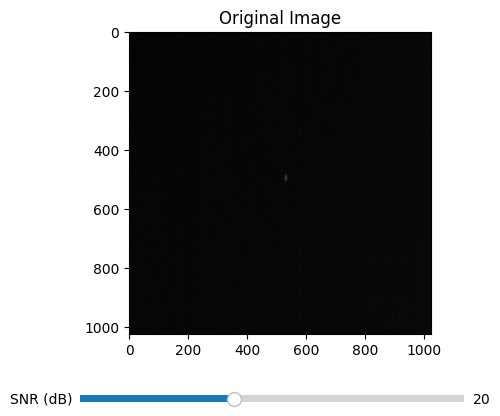

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def load_hdf_dataset():
    
    filename = 'iawross.hdf'  # Update with your file path
    hdf = SD(filename, SDC.READ)
    
    # Get dataset
    dataset_name = list(hdf.datasets().keys())[0]
    data = hdf.select(dataset_name)
    dataset = data[:, :].astype(np.float64)
    return dataset.astype(np.float32)

def create_interface(original):
    fig, ax = plt.subplots()
    plt.subplots_adjust(bottom=0.25)
    
    # Handle 3D data
    if original.ndim == 3:
        display_data = original[0]
    else:
        display_data = original
        
    img = ax.imshow(display_data, cmap='gray', vmin=np.min(display_data), vmax=np.max(display_data))
    plt.title('Original Image')
    
    # Create slider with keyword arguments
    ax_snr = plt.axes([0.2, 0.1, 0.6, 0.03])
    snr_slider = Slider(
        ax=ax_snr,
        label='SNR (dB)',
        valmin=0,
        valmax=50,
        valinit=20  # Using keyword argument
    )
    
    return fig, img, snr_slider

def create_update_function(original, img):
    # Calculate signal power for the displayed slice
    if original.ndim == 3:
        signal_power = np.var(original[0])
    else:
        signal_power = np.var(original)
    
    def update(val):
        snr_db = val
        snr_linear = 10 ** (snr_db / 10)
        noise_power = signal_power / snr_linear
        
        # Generate noise for the current slice
        if original.ndim == 3:
            current_slice = original[0]  # Or use slice slider
            noise = np.random.normal(0, np.sqrt(noise_power), current_slice.shape)
            noisy_image = current_slice + noise
        else:
            noise = np.random.normal(0, np.sqrt(noise_power), original.shape)
            noisy_image = original + noise
        
        img.set_data(noisy_image)
        img.set_clim(vmin=np.min(noisy_image), vmax=np.max(noisy_image))
        plt.title(f'SNR: {snr_db:.1f} dB')
        fig.canvas.draw_idle()
    
    return update

if __name__ == "__main__":
    FILE_PATH = 'IAW-s108135hdf'
    DATASET_PATH = 'data/'
    
    original_image = load_hdf_dataset()
    
    # If 3D data, select first slice for demonstration
    if original_image.ndim == 3:
        original_image = original_image[0]
    
    fig, img, snr_slider = create_interface(original_image)
    update_fn = create_update_function(original_image, img)
    snr_slider.on_changed(update_fn)
    
    plt.show()

pip install h5py

In [2]:
pip install h5py

   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 3.0/3.0 MB 17.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
